<a href="https://colab.research.google.com/github/harshit433/Heart-stroke-prediction/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all we install opendatasets library to import our Stroke Prediction dataset from kaggle.

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the required modules to work with the data.

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Downloading the stroke prediction dataset from kaggle using opendatasets 

In [ ]:
od.download("https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harshitaggarwal0414
Your Kaggle Key: ··········


100%|██████████| 67.4k/67.4k [00:00<00:00, 34.5MB/s]

Reading the dataset

In [ ]:
data  = pd.read_csv("stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The BMI column contains multiple null entries. 

In [ ]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


The BMI of a person is mostly dependent on the age among all the numerical features. We can use the age of the person to fill the missing values in the BMI column but we also need to look at the relation between BMI of a person and the other categorical featues. 

In [ ]:
columns = data.columns
num_cols = data._get_numeric_data().columns

In [ ]:
cat_cols = list(set(columns) - set(num_cols))

cat_cols and num_cols stores a list of the categorical columns and numerical columns respectively to study their relationship with BMI.

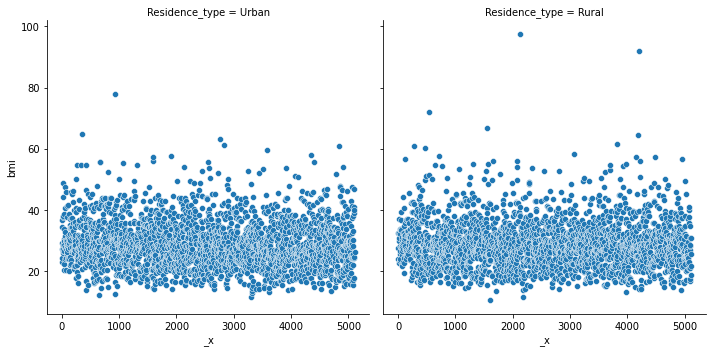

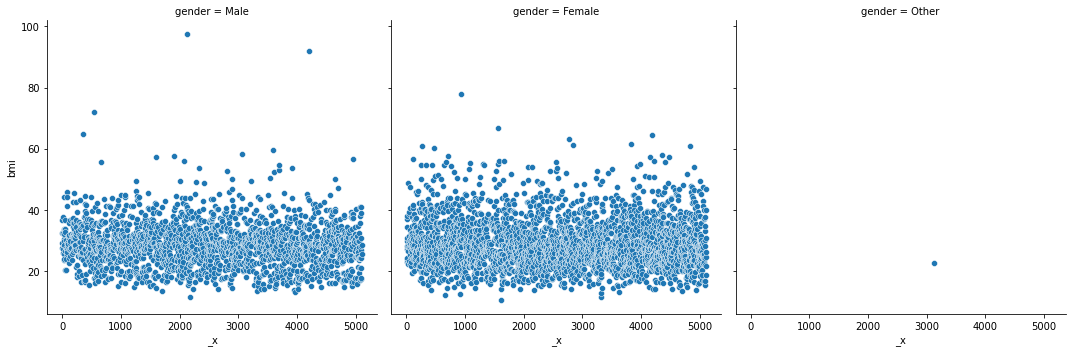

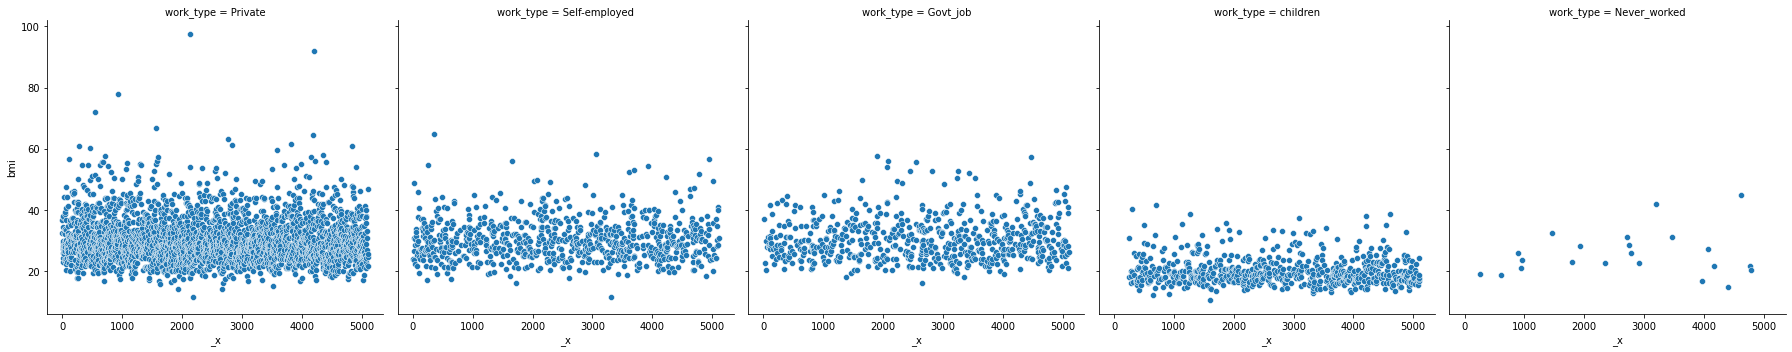

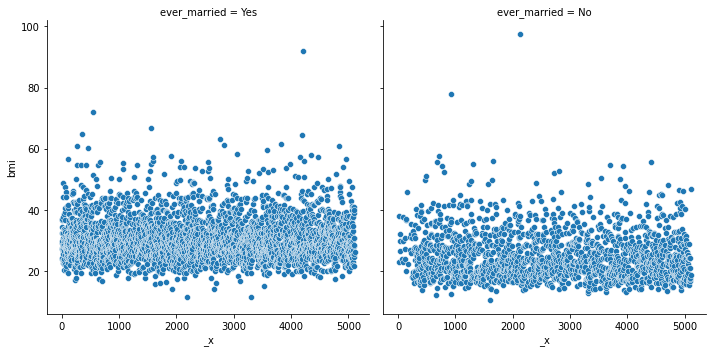

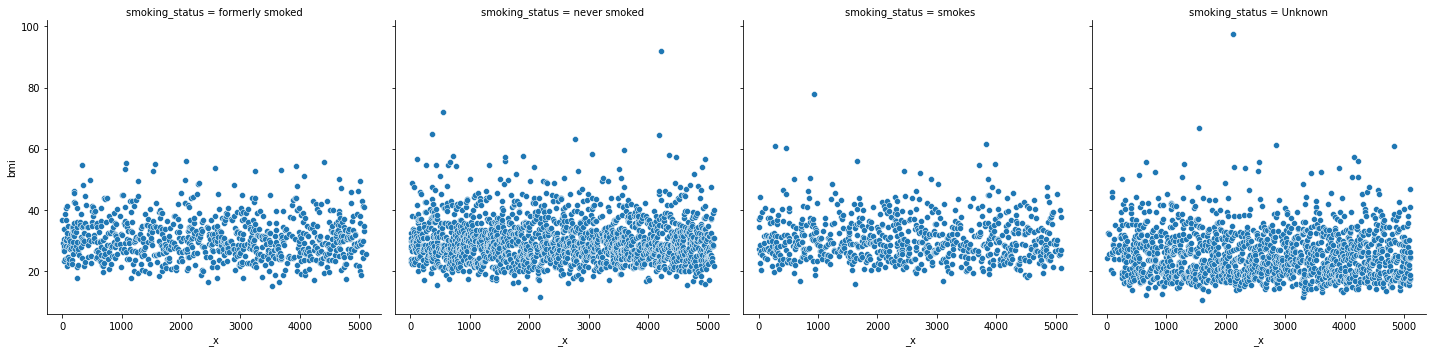

In [ ]:
for i in cat_cols:
  sns.relplot(data = data, x = data.index, y= "bmi",col = i)

According the above graphs, only work type of the person is related to the bmi. All the other remaining columns are either not related to the bmi or have very insignificant correlation.

<AxesSubplot:xlabel='age', ylabel='bmi'>

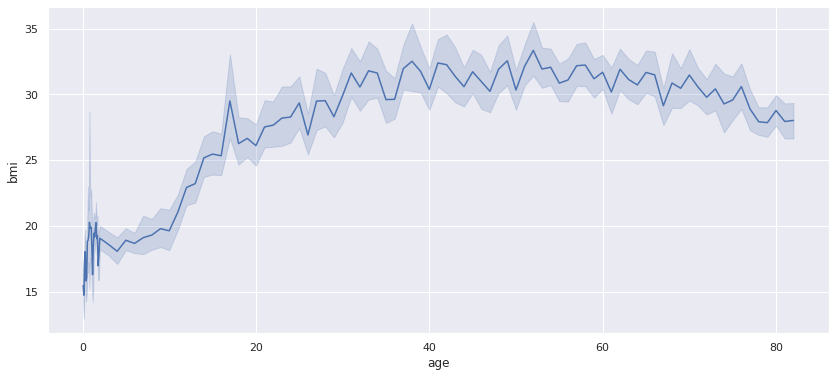

In [ ]:
sns.set(rc={"figure.figsize":(14, 6)})
sns.lineplot(data = data,x= 'age',y = 'bmi')

The lineplot above clearly verifies the correlation between age and BMI of a person. The BMI of a person increases till 50 years of age and then decreases.

In [ ]:
age_bmi  = dict(data.groupby('age')['bmi'].mean())

In [ ]:
data['bmi'] =  data['age'].map(age_bmi)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.drop('id', axis = 1,inplace= True)

<AxesSubplot:xlabel='gender', ylabel='stroke'>

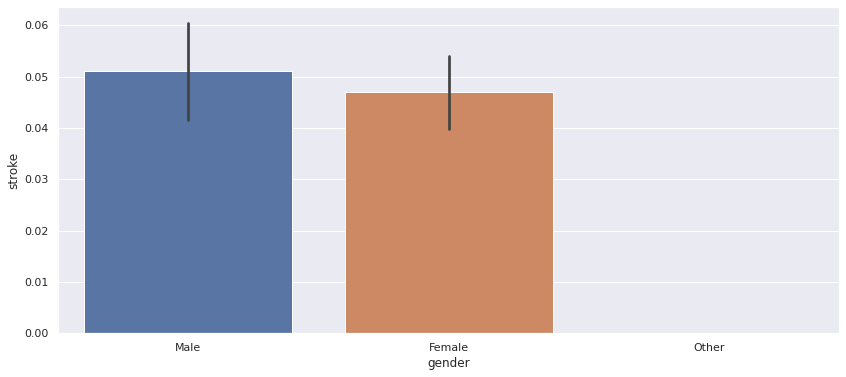

In [ ]:
sns.barplot(data=data, x= 'gender',y= 'stroke')

In [ ]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
data.gender = data.gender.replace({'Male':3,'Female':2,'Other':1})

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

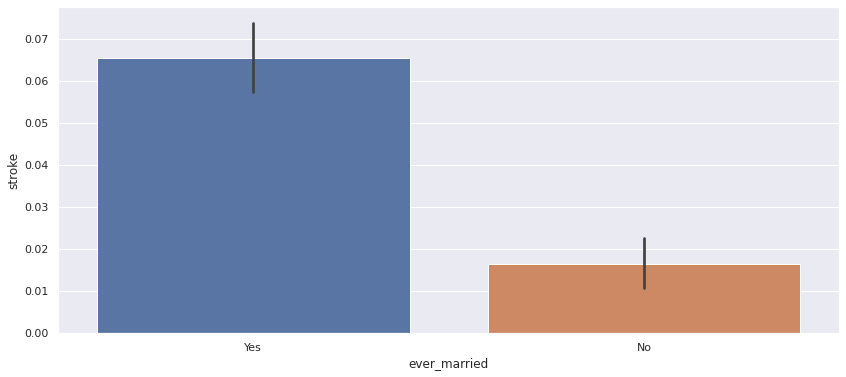

In [ ]:
sns.barplot(data=data, x= 'ever_married',y= 'stroke')

<AxesSubplot:xlabel='ever_married', ylabel='bmi'>

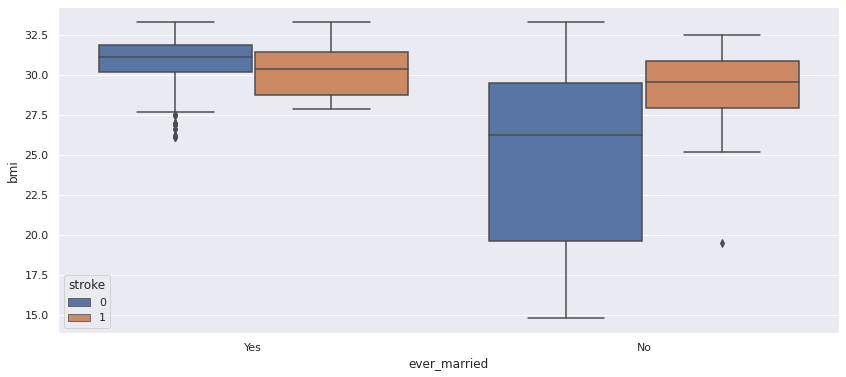

In [ ]:
sns.boxplot(data = data,x= 'ever_married',y='bmi',hue='stroke')

In [ ]:
data.ever_married = data.ever_married.replace({'Yes':2,'No':1})

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

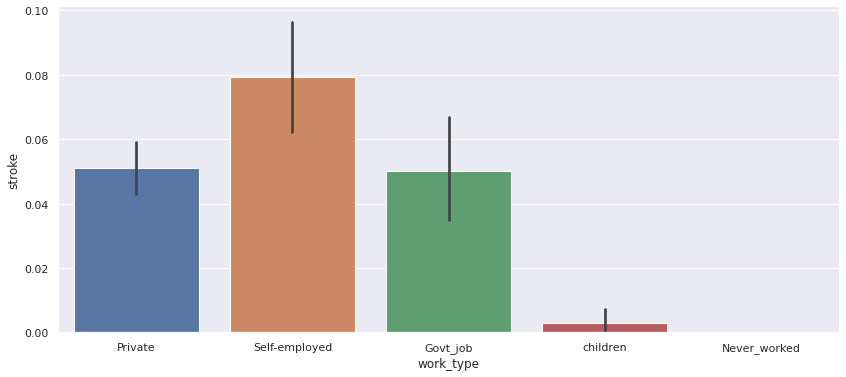

In [ ]:
sns.barplot(data=data, x= 'work_type',y= 'stroke')

In [ ]:
data.work_type = data.work_type.replace({'Self-employed':5,'Govt_job':4,'Private':3,'children':2,'Never_worked':1})

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

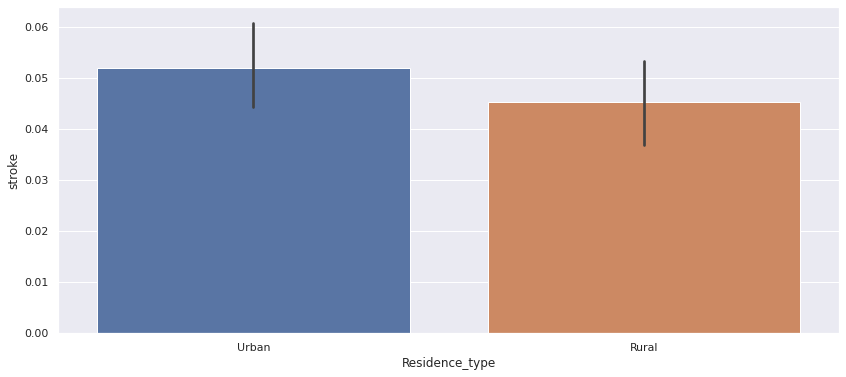

In [ ]:
sns.barplot(data=data, x= 'Residence_type',y= 'stroke')

In [ ]:
data.Residence_type = data.Residence_type.replace({'Urban':2,'Rural':1})

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

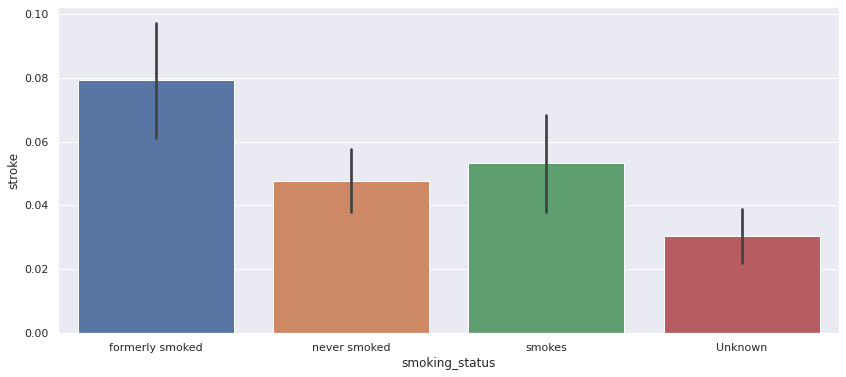

In [ ]:
sns.barplot(data=data, x= 'smoking_status',y= 'stroke')

In [ ]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
data.smoking_status = data.smoking_status.replace({'formerly smoked':3,'smokes':2,'never smoked':1,'Unknown':0})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


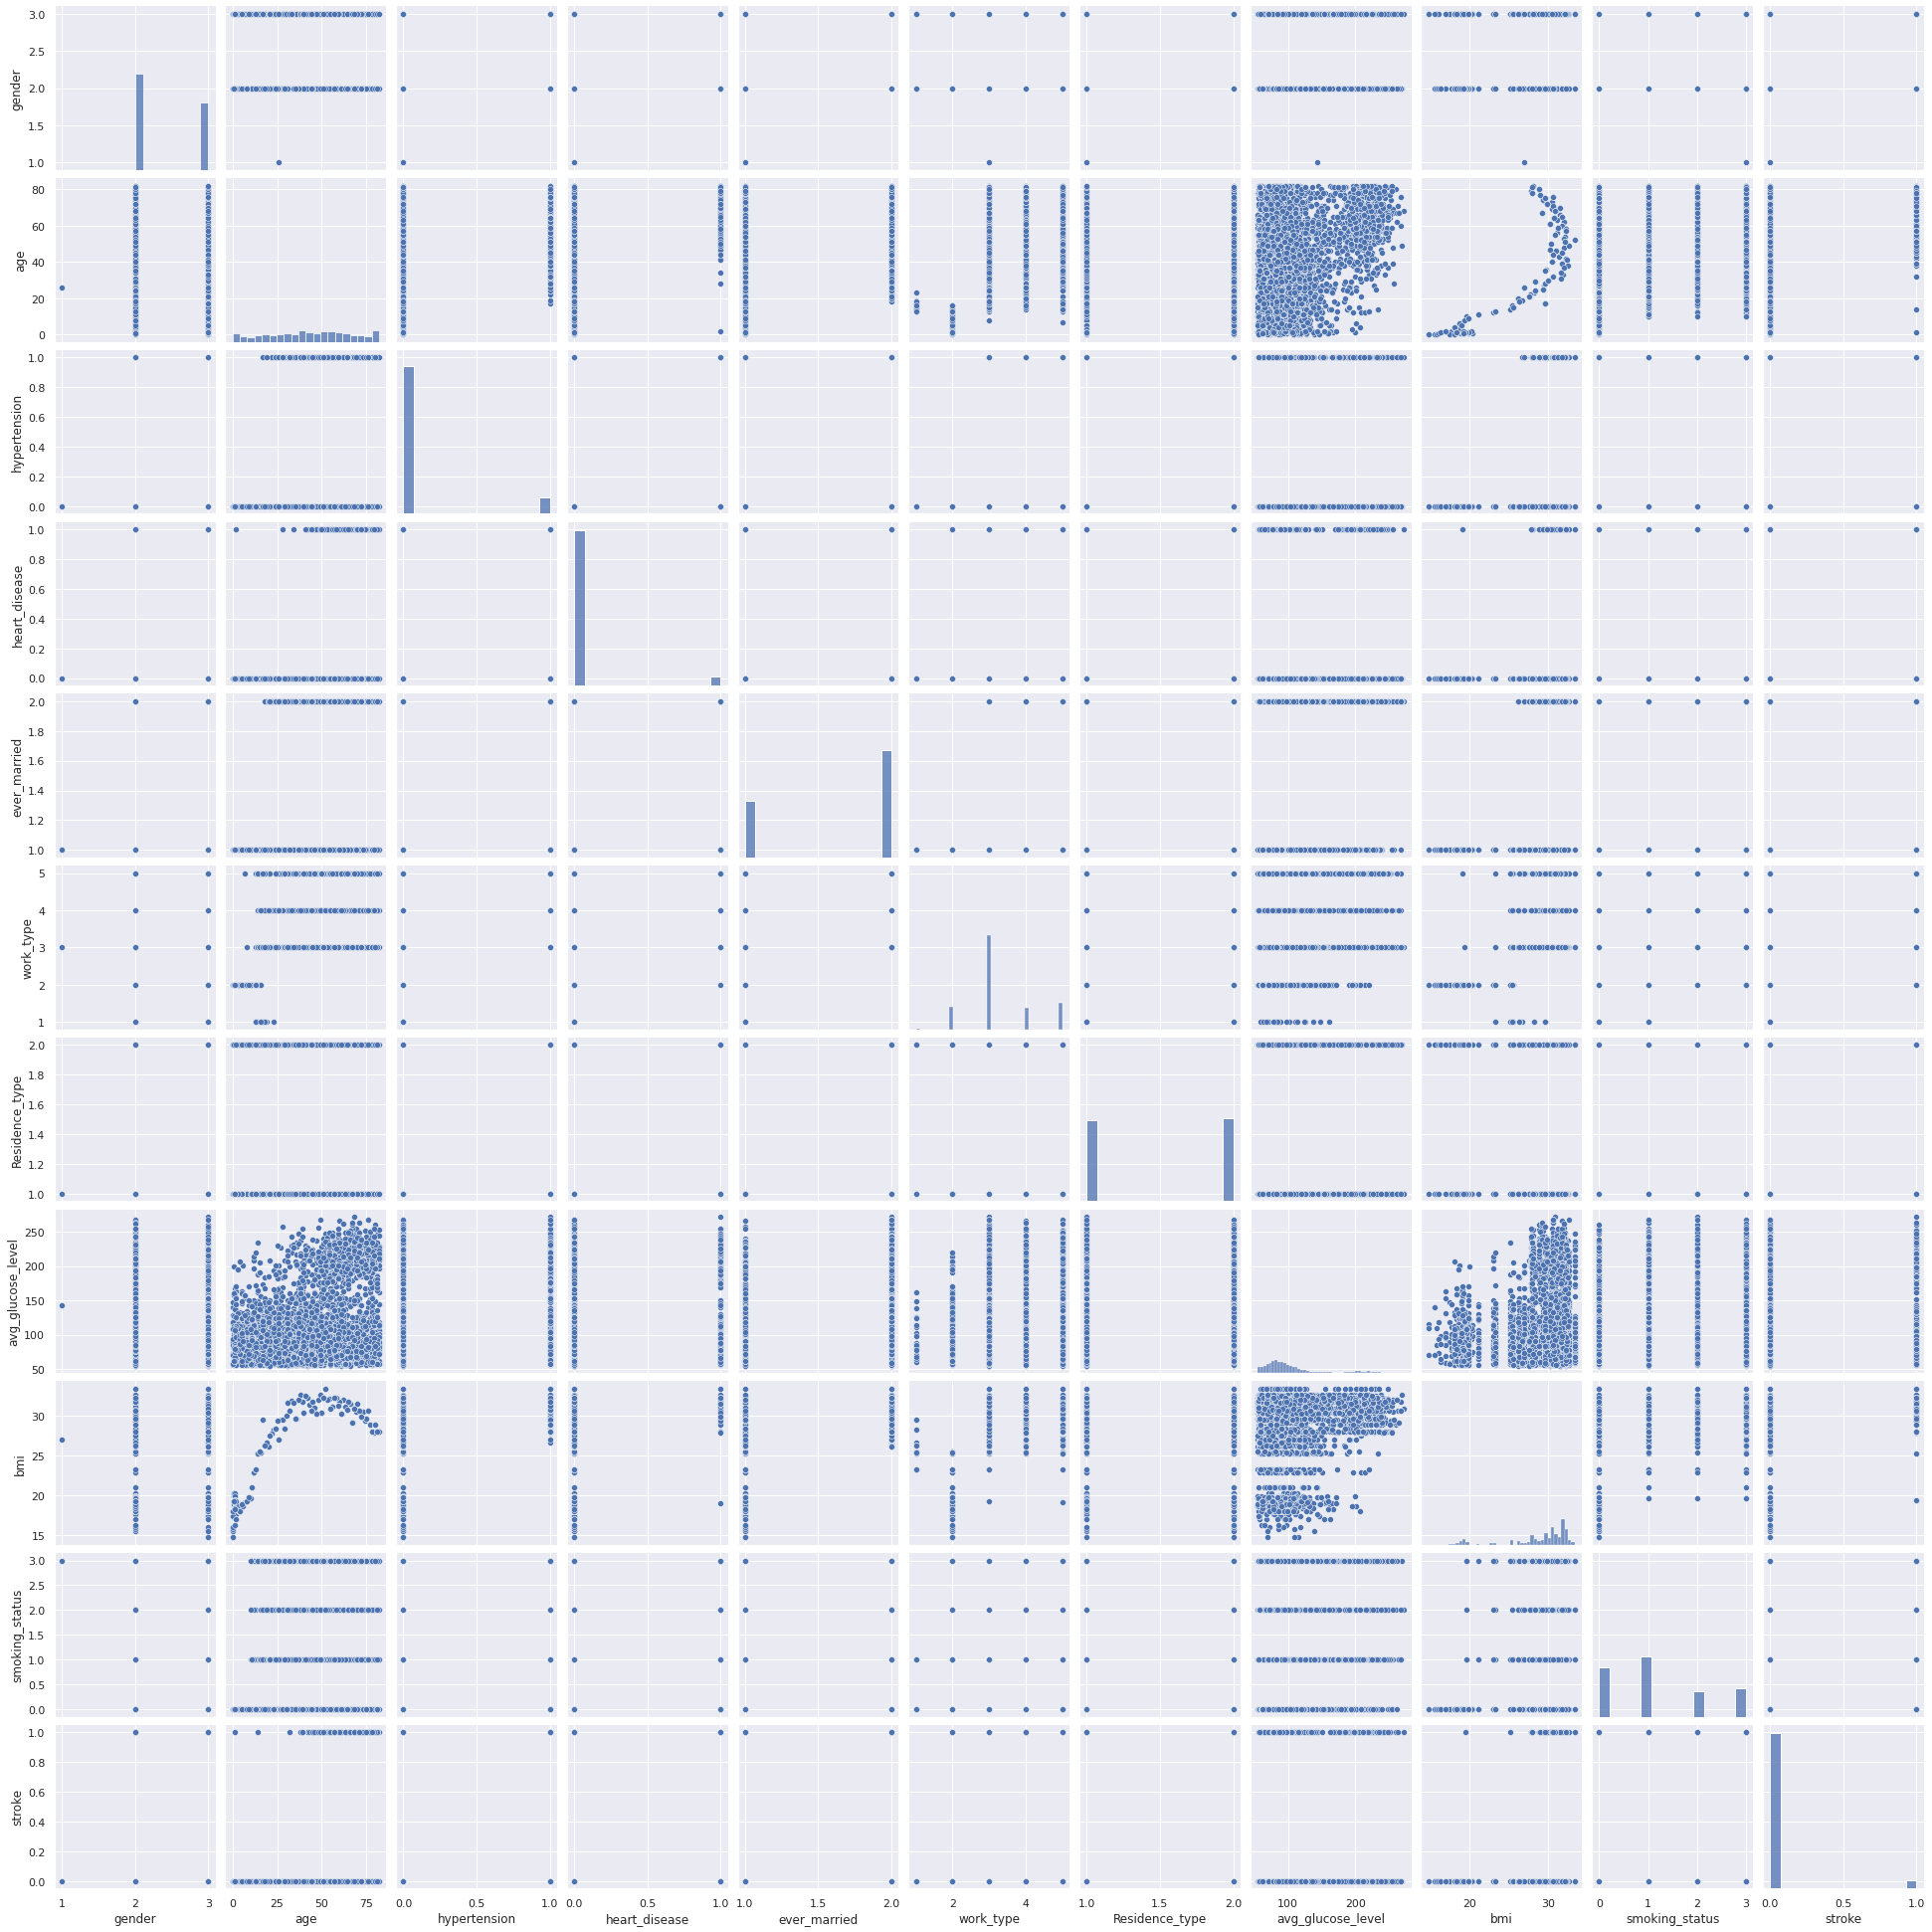

In [ ]:
sns.pairplot(data)

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,3,67.0,0,1,2,3,2,228.69,29.144444,3,1
1,2,61.0,0,0,2,5,1,202.21,30.190000,1,1
2,3,80.0,0,1,2,3,1,105.92,28.783582,1,1
3,2,49.0,0,0,2,3,2,171.23,32.555263,2,1
4,2,79.0,1,0,2,5,1,174.12,27.862338,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,2,3,2,83.75,28.783582,1,0
5106,2,81.0,0,0,2,5,2,125.20,27.951667,1,0
5107,2,35.0,0,0,2,5,1,82.99,29.609804,1,0
5108,3,51.0,0,0,2,3,1,166.29,32.145783,3,0


In [ ]:
data.corr().sort_values('stroke')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027300,0.021390,0.085749,-0.029366,-0.061982,-0.005529,0.054213,-0.073433,0.007950,0.009200
Residence_type,-0.005529,0.014180,-0.007913,0.003092,0.006261,0.010951,1.000000,-0.004946,-0.006959,0.015738,0.015458
bmi,-0.073433,0.650001,0.135726,0.066176,0.650395,0.521354,-0.006959,0.116063,1.000000,0.399382,0.060944
smoking_status,0.007950,0.360128,0.114671,0.092186,0.303865,0.271021,0.015738,0.096447,0.399382,1.000000,0.073804
work_type,-0.061982,0.561490,0.151282,0.107083,0.421965,1.000000,0.010951,0.096110,0.521354,0.271021,0.084714
ever_married,-0.029366,0.679125,0.164243,0.114644,1.000000,0.421965,0.006261,0.155068,0.650395,0.303865,0.108340
hypertension,0.021390,0.276398,1.000000,0.108306,0.164243,0.151282,-0.007913,0.174474,0.135726,0.114671,0.127904
avg_glucose_level,0.054213,0.238171,0.174474,0.161857,0.155068,0.096110,-0.004946,1.000000,0.116063,0.096447,0.131945
heart_disease,0.085749,0.263796,0.108306,1.000000,0.114644,0.107083,0.003092,0.161857,0.066176,0.092186,0.134914
age,-0.027300,1.000000,0.276398,0.263796,0.679125,0.561490,0.014180,0.238171,0.650001,0.360128,0.245257


In [ ]:
hypertension_and_heart_disease = data['hypertension'] + data['heart_disease']

In [ ]:
pearsonr(hypertension_and_heart_disease,data.stroke)

(0.17461607979217872, 2.8623104363260793e-36)

In [ ]:
data.hypertension = hypertension_and_heart_disease
data.drop('heart_disease',axis=1,inplace=True)

In [ ]:
data.rename(columns = {'hypertension' :'hypertension_and_heart_disease'},inplace = True)

In [ ]:
working_smoking_habits = (1 + data['work_type']+data['smoking_status'])*data['age']

In [ ]:
pearsonr(working_smoking_habits,data.stroke)

(0.22380057693967464, 5.025651001842363e-59)

In [ ]:
data.work_type = working_smoking_habits
data.drop('smoking_status',axis=1,inplace=True)
data.rename(columns = {'work_type' :'working_smoking_habits'},inplace = True)

In [ ]:
age_glucose_combined = data['age']*(data['avg_glucose_level'])

In [ ]:
pearsonr(age_glucose_combined,data.stroke)

(0.2465576784954352, 1.2294594087602116e-71)

In [ ]:
data.avg_glucose_level = age_glucose_combined
data.rename(columns = {'avg_glucose_level' :'age_glucose_combined'},inplace = True)

In [ ]:
data.corr()

,gender,age,hypertension_and_heart_disease,ever_married,working_smoking_habits,Residence_type,age_glucose_combined,bmi,stroke
gender,1.000000,-0.027300,0.065648,-0.029366,-0.012686,-0.005529,0.021333,-0.073433,0.009200
age,-0.027300,1.000000,0.361335,0.679125,0.915539,0.014180,0.744796,0.650001,0.245257
hypertension_and_heart_disease,0.065648,0.361335,1.000000,0.190426,0.351879,-0.004205,0.380549,0.140888,0.174616
ever_married,-0.029366,0.679125,0.190426,1.000000,0.612574,0.006261,0.489098,0.650395,0.108340
working_smoking_habits,-0.012686,0.915539,0.351879,0.612574,1.000000,0.019973,0.688531,0.566998,0.223801
Residence_type,-0.005529,0.014180,-0.004205,0.006261,0.019973,1.000000,0.010547,-0.006959,0.015458
age_glucose_combined,0.021333,0.744796,0.380549,0.489098,0.688531,0.010547,1.000000,0.432147,0.246558
bmi,-0.073433,0.650001,0.140888,0.650395,0.566998,-0.006959,0.432147,1.000000,0.060944
stroke,0.009200,0.245257,0.174616,0.108340,0.223801,0.015458,0.246558,0.060944,1.000000


In [ ]:
data.drop('gender',axis=1,inplace=True)

In [ ]:
data

,age,hypertension_and_heart_disease,ever_married,working_smoking_habits,Residence_type,age_glucose_combined,bmi,stroke
0,67.0,1,2,469.0,2,15322.23,29.144444,1
1,61.0,0,2,427.0,1,12334.81,30.190000,1
2,80.0,1,2,400.0,1,8473.60,28.783582,1
3,49.0,0,2,294.0,2,8390.27,32.555263,1
4,79.0,1,2,553.0,1,13755.48,27.862338,1
...,...,...,...,...,...,...,...,...
5105,80.0,1,2,400.0,2,6700.00,28.783582,0
5106,81.0,0,2,567.0,2,10141.20,27.951667,0
5107,35.0,0,2,245.0,1,2904.65,29.609804,0
5108,51.0,0,2,357.0,1,8480.79,32.145783,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
X = data.drop('stroke',axis=1)

In [ ]:
y = data.stroke

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42,test_size = 0.75)

In [ ]:
model = SVC(kernel="rbf")
model.fit(train_x,train_y)

SVC()

In [ ]:
model_1 = LogisticRegression(random_state=42)
model_1.fit(train_x,train_y)

LogisticRegression(random_state=42)

In [ ]:
predicted_y = model.predict(test_x)
predicted_y_1 = model_1.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_y,predicted_y)
#accuracy_score(test_y,predicted_y_1)

0.951995825723976

In [ ]:
confusion_matrix(test_y,predicted_y)

array([[3649,    0],
       [ 184,    0]])